# README
This notebook is used to plot the life distribution of each dataset

In [3]:
import os
import sys
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
import matplotlib.pyplot as plt
import numpy as np
from data_provider.data_split_recorder import split_recorder
import json
import pandas as pd

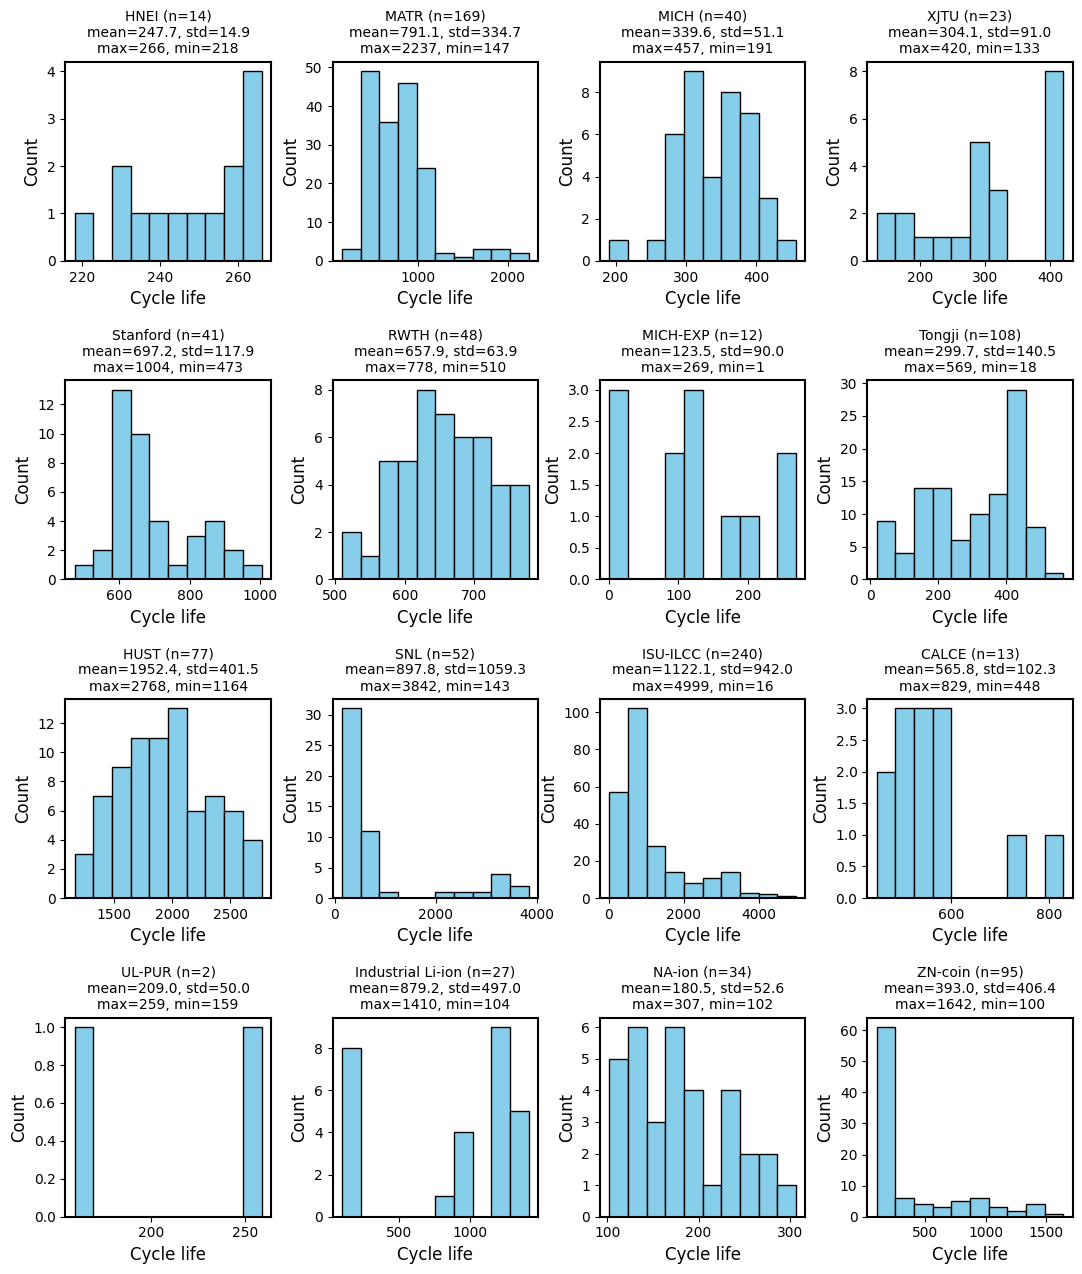

In [4]:
dataset_names = ['HNEI', 'MATR', 'MICH', 'XJTU', 'Stanford', 'RWTH', 'MICH-EXP', 'Tongji', 
                 'HUST', 'SNL', 'ISU-ILCC', 'CALCE', 'UL-PUR', 'CALB', 'NA-ion', 'ZN-coin']

data_path = '/data/trf/python_works/BatteryLife/dataset/Life labels/'

fig = plt.figure(figsize=(13, 15))

for i, dataset_name in enumerate(dataset_names):

    # --- 处理 MICH / MICH-EXP 特殊情况 ---
    if dataset_name in ['MICH', 'MICH-EXP']:
        dataset_name_key = 'total_MICH'
        if dataset_name == 'MICH-EXP':
            cell_names = split_recorder.MICH_EXP_train_files + \
                         split_recorder.MICH_EXP_test_files + \
                         split_recorder.MICH_EXP_val_files
        else:
            cell_names = split_recorder.MICH_train_files + \
                         split_recorder.MICH_test_files + \
                         split_recorder.MICH_val_files
    else:
        dataset_name_key = dataset_name

    life_label = json.load(open(f'{data_path}{dataset_name_key}_labels.json', 'r'))

    if dataset_name not in ['MICH', 'MICH-EXP']:
        life_labels = list(life_label.values())
    else:
        life_labels = [life_label[c] for c in cell_names if c in life_label]

    # --- 创建子图 ---
    ax = plt.subplot(4, 4, i + 1)

    # --- 绘图 ---
    ax.hist(life_labels, color='skyblue', edgecolor='black')

    # --- 加粗坐标轴外框 ---
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    # --- 统计特征 ---
    arr = np.array(life_labels)
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    max_val = np.max(arr)
    min_val = np.min(arr)

    # --- 标题（3 行） ---
    if dataset_name != 'CALB':
        ax.set_title(
            f"{dataset_name} (n={len(life_labels)})\n"
            f"mean={mean_val:.1f}, std={std_val:.1f}\n"
            f"max={max_val:.0f}, min={min_val:.0f}",
            fontsize=10
        )
    else:
        ax.set_title(
            f"Industrial Li-ion (n={len(life_labels)})\n"
            f"mean={mean_val:.1f}, std={std_val:.1f}\n"
            f"max={max_val:.0f}, min={min_val:.0f}",
            fontsize=10
        )

    # --- X / Y 轴标题字体调大 ---
    ax.set_xlabel('Cycle life', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# --- 子图间距 ---
plt.subplots_adjust(hspace=0.6, wspace=0.30)


# --- 保存高清 JPG 无白边 ---
plt.savefig(
    "./life_distribution.jpg",
    dpi=600,
    bbox_inches='tight'
)
plt.show()
